# Machine Learning using SVM to predict stock prices

In [2]:
# I will predict stock prices by using machine learning models (SVM).

#First install the dependencies:

In [3]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [167]:
import quandl
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [50]:
#Get the stock data, I chose Amazon to start with.
AM = quandl.get("WIKI/AMZN")
#Lets have a look at the data
print(AM.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

In [51]:
print(AM.tail())

               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1586.45  1590.00  1563.17  1581.86  4667291.0          0.0   
2018-03-22  1565.47  1573.85  1542.40  1544.10  6177737.0          0.0   
2018-03-23  1539.01  1549.02  1495.36  1495.56  7843966.0          0.0   
2018-03-26  1530.00  1556.99  1499.25  1555.86  5547618.0          0.0   
2018-03-27  1572.40  1575.96  1482.32  1497.05  6793279.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1586.45    1590.00   1563.17     1581.86   
2018-03-22          1.0    1565.47    1573.85   1542.40     1544.10   
2018-03-23          1.0    1539.01    1549.02   1495.36     1495.56   
2018-03-26          1.0    1530.00    1556.99   1499.25     1555.86   
2018-03-27          1.0    1572.40    1575.96   1482.32

In [52]:
#So we have every day from mid 1997 to april 2018.
#We are only really interested in the Adjusted Close Price, lets isolate that in our df.
AM = AM[['Adj. Close']]
print(AM.head())

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


In [53]:
#Lets now creat a new column where each entry is the following days acp.
AM['Tommorow'] = AM[['Adj. Close']].shift(-1)
print(AM.tail())

            Adj. Close  Tommorow
Date                            
2018-03-21     1581.86   1544.10
2018-03-22     1544.10   1495.56
2018-03-23     1495.56   1555.86
2018-03-26     1555.86   1497.05
2018-03-27     1497.05       NaN


In [54]:
#As we can see there is no prediction for the last day in the dataframe.
#Next we will need to put these predictions into a numpy array.
AM_prediction = np.array(AM['Tommorow'])
#Except the last days entry.
AM_prediction = AM_prediction[:-1]

#We will also need an array containing the actual price for that day.
AM_acp = np.array(AM.drop(['Tommorow'],1))

#Remove the last days entry.
AM_acp = AM_acp[:-1]
print(AM_acp)

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1544.1       ]
 [1495.56      ]
 [1555.86      ]]


In [55]:
len(AM_prediction)

5247

In [56]:
#Now we are going to build the model, we will be using a support vector machine model this time.
#Split the data into 80% training and 20% testing
AM_acp_train, AM_acp_test, AM_pred_train, AM_pred_test = train_test_split(AM_acp, AM_prediction, test_size=0.2)

In [57]:
# Create and train the SVM (called SVR in sklearn for some reason).
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(AM_acp_train, AM_pred_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
#Lets test the model using the R^2 of the prediction. 
svm_confidence = svr_rbf.score(AM_acp_test, AM_pred_test)
print(svm_confidence)

0.9721877958775341


In [59]:
#A very high score!
#However I reckon I can improve it by removing some of the older data.
(AM_acp)

array([[   1.72916667],
       [   1.70833333],
       [   1.63583333],
       ...,
       [1544.1       ],
       [1495.56      ],
       [1555.86      ]])

In [60]:
#

AM1_acp = AM_acp[4000:]
#AM1_acp = AM1_acp[:-1]

AM1_prediction = np.array(AM['Tommorow'])[3999:]
AM1_prediction = AM1_prediction[:-2]
print(AM1_prediction)

[ 269.85  272.87  267.72 ... 1544.1  1495.56 1555.86]


In [61]:
print(AM1_acp)

[[ 269.85]
 [ 272.87]
 [ 267.72]
 ...
 [1544.1 ]
 [1495.56]
 [1555.86]]


In [62]:
AM1_acp_train, AM1_acp_test, AM1_pred_train, AM1_pred_test = train_test_split(AM1_acp, AM1_prediction, test_size=0.2)

In [63]:
svr_rbf1 = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf1.fit(AM1_acp_train, AM1_pred_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [64]:
svm_Rsq = svr_rbf1.score(AM1_acp_test, AM1_pred_test)
print(svm_Rsq)

0.9084340773415346


In [65]:
#Ok maybe it was better with all the data after all.
#Instead lets compare our model with a linear regression.
lr = LinearRegression()
lr.fit(AM_acp_train, AM_pred_train)
lr_Rsq = lr.score(AM_acp_test, AM_pred_test)
print(lr_Rsq)

0.999341540816227


In [161]:
#Wow that is an extremely high score! Lets test it out.
#I will write a function taking a date as the input, which outputs a predicted price based on as much prior data as possible.

def todaysprice(today):       #yyyy-mm-dd
    X = AM.loc['1997-05-16' : today][['Adj. Close']]
    X = X[:-1]
    print('Prediction:')
    print(lr.predict(X)[len(X)-1])
    print()
    print('Actual price that day:')
    print(AM.loc[today][0])

In [162]:
todaysprice('2013-04-04')

Prediction:
259.38566465560814

Actual price that day:
259.08


In [163]:
#Not too bad! We can also use todays stock to predict tommorows, meaning we can predict future changes using this model.
def tomorrows_stock(todays_stock):
    x = {'Adj. Close' : [todays_stock]}
    print('Prediction:')
    print(lr.predict(pd.DataFrame(x))[0])



In [165]:
tomorrows_stock(1581.86)

Prediction:
1584.178759779921


In [166]:
todaysprice('2018-03-22')

Prediction:
1584.178759779921

Actual price that day:
1544.1


Text(0.5, 1.0, 'Plot of Actual price vs predicted')

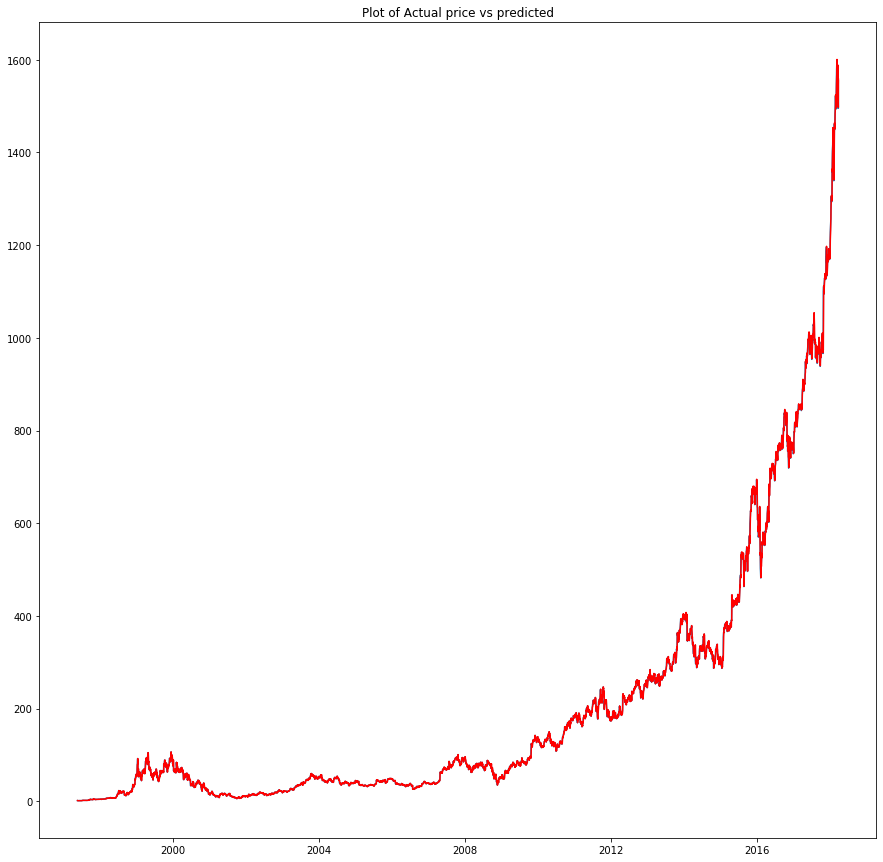

In [218]:
#So both functions give us the same prediction.
#Notice that this much more recent 2018 prediction is a lot less accurate than the earlier 2013 prediction.
#Lets plot the predictions against real values to see whats going on.
AM_x = AM[['Adj. Close']].drop(pd.to_datetime('1997-05-16'))
pred_y = lr.predict(AM[['Adj. Close']][:-1])

plt.figure(figsize = (15,15))
plt.plot(AM_x.index, AM_x)
plt.plot(AM_x.index, pred_y, c = 'red')

plt.title("Plot of Actual price vs predicted")


In [196]:
AM.drop(pd.to_datetime('1997-05-16'))[['Adj. Close']]

,Adj. Close
Date,
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
1997-05-23,1.500000
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


In [205]:
len(AM.drop(pd.to_datetime('1997-05-16'))[['Adj. Close']])

5247

In [204]:
len(lr.predict(AM[['Adj. Close']][:-1]))

5247

In [178]:
todaysprice('2018-03-27')

Prediction:
1558.1401754771518

Actual price that day:
1497.05


In [201]:
type(AM.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [206]:
len(AM[['Adj. Close']].drop(pd.to_datetime('1997-05-16')))


5247

In [207]:
len(lr.predict(AM[['Adj. Close']][:-1]))

5247